### Import necessary Libraries and the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv(r"Cardiovascular Disease.csv")
pd.set_option("display.max_columns",None)

In [3]:
df.head()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   sex                  303 non-null    int64  
 2   chest_pain_type      303 non-null    int64  
 3   resting_bp           303 non-null    int64  
 4   cholestoral          303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   restecg              303 non-null    int64  
 7   max_hr               303 non-null    int64  
 8   exang                303 non-null    int64  
 9   oldpeak              303 non-null    float64
 10  slope                303 non-null    int64  
 11  num_major_vessels    303 non-null    int64  
 12  thal                 303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### Checking the null values

In [5]:
df.isnull().sum()

age                    0
sex                    0
chest_pain_type        0
resting_bp             0
cholestoral            0
fasting_blood_sugar    0
restecg                0
max_hr                 0
exang                  0
oldpeak                0
slope                  0
num_major_vessels      0
thal                   0
target                 0
dtype: int64

#### Statistical Analysis

In [6]:
df.describe()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_bp', 'cholestoral',
       'fasting_blood_sugar', 'restecg', 'max_hr', 'exang', 'oldpeak', 'slope',
       'num_major_vessels', 'thal', 'target'],
      dtype='object')

#### Information of the dataset columns

- age: Age of the person (in years)
- sex: Gender of the person (1 = male; 0 = female)
- chest_pain_type: Type of chest pain
    0: Typical angina
    1: Atypical angina
    2: Non-anginal pain
    3: Asymptomatic
- resting_bp: Resting blood pressure (mm Hg)
- cholesterol: Serum cholesterol level (mg/dl)
- fasting_blood_sugar: Fasting blood sugar (> 120 mg/dl) (1 = true; 0 = false)
- restecg: Resting electrocardiographic results
    0: Normal
    1: ST-T wave abnormality
    2: Probable or definite left ventricular hypertrophy by Estes’ criteria
- max_hr: Maximum heart rate achieved
- exang: Exercise-induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: Slope of the peak exercise ST segment
    0: Upsloping
    1: Flat
    2: Downsloping
- num_major_vessels: Number of major vessels colored by fluoroscopy (0-3)
- thal: Thalassemia
    0: Normal
    1: Fixed defect
    2: Reversible defect

`Note`: Thalassemia may lead to iron overload in the body, affecting heart, liver, and endocrine functions.
- target: Presence of cardiovascular disease
   0: No disease
   1: Disease

### Data Analysis and Data Visualization

#### target
Patients with the Heart Disease
- 0: No Disease
- 1: Disease

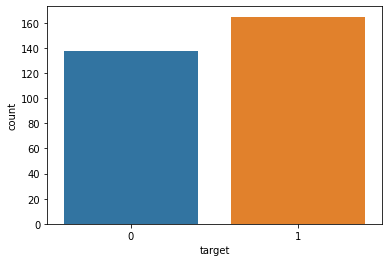

In [8]:
# analysing the target variable
sns.countplot(x=df['target'])

plt.show()

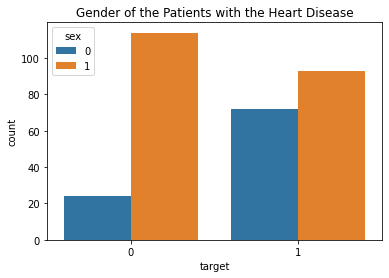

In [9]:
sns.countplot(data=df, x='target', hue='sex')
plt.title("Gender of the Patients with the Heart Disease")
plt.show()

#### Number of Male and Female Patients

In [10]:
male = df[df['sex']==1].value_counts().sum()
print(f'Total Number of Male Patients: {male}')

Total Number of Male Patients: 207


In [11]:
female = df[df['sex']==0].value_counts().sum()
print(f'Total Number of Female Patients: {female}')

Total Number of Female Patients: 96


<AxesSubplot:xlabel='sex', ylabel='count'>

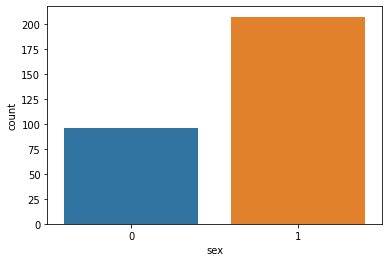

In [12]:
sns.countplot(x = df['sex'])

#### Age of the Patients

In [13]:
print(f"The minimum age of the patient is {df['age'].min()}, and the maximum age  is {df['age'].max()}")

The minimum age of the patient is 29, and the maximum age  is 77


<AxesSubplot:xlabel='age', ylabel='count'>

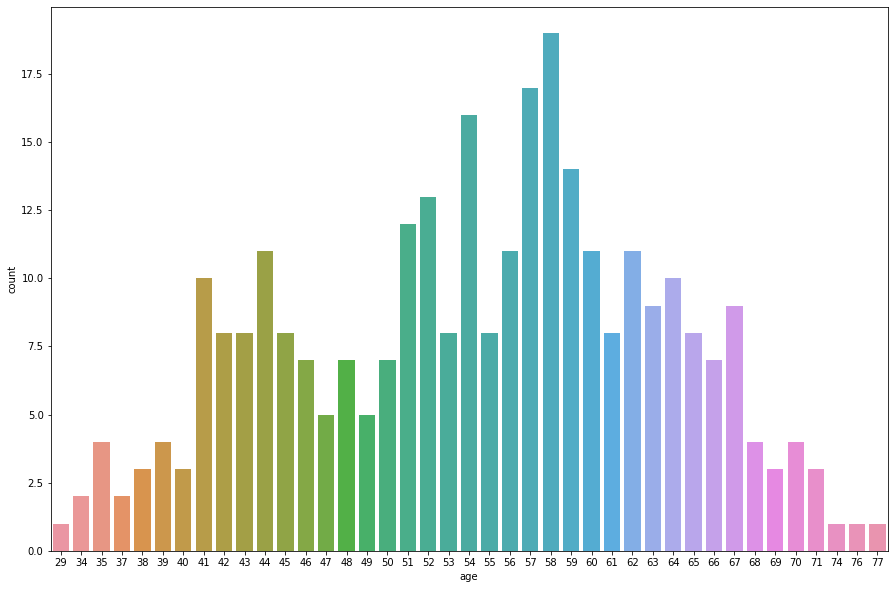

In [14]:
plt.figure(figsize=(15,10))
sns.countplot(data=df, x='age')

#### chest_pain_type

The type of chest pain experienced by the patients
- 0: Typical angina 
- 1: Atypical angina 
- 2: Non-anginal pain 
- 3: Asymptomatic

Type 3 has 23 patients
Type 2 has 87 patients
Type 1 has 50 patients
Type 0 has 143 patients


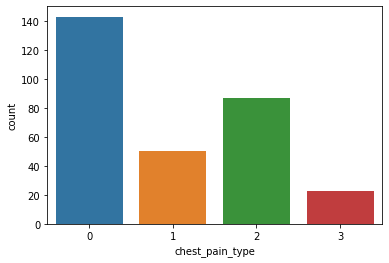

In [15]:
pain_type= {}

for i in df['chest_pain_type']:
    if i in pain_type:
        pain_type[i] += 1
    else:
        pain_type[i] = 1

for i, j in pain_type.items():
    print(f"Type {i} has {j} patients")

    
# visualising the data
sns.countplot(x=df['chest_pain_type'])

plt.show()

#### fasting blood sugar

checking the glucose level in the body of the patients
- 1: gluscose levels > 120 mg/dl
- 0: glucose levels < 120 mg/dl

Type 1 has 45 patients
Type 0 has 258 patients


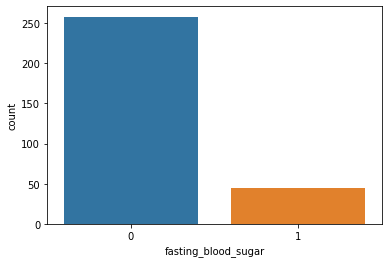

In [16]:
sugar= {}

for i in df['fasting_blood_sugar']:
    if i in sugar:
        sugar[i] += 1
    else:
        sugar[i] = 1

for i, j in sugar.items():
    print(f"Type {i} has {j} patients")

    
# visualising the data
sns.countplot(x=df['fasting_blood_sugar'])

plt.show()

#### restecg

electrical activity of the heart
- 0: Normal
- 1: ST-T wave abnormality
- 2: Probable or definite left ventricular hypertrophy by Estes’ criteria

Type 0 has 147 patients
Type 1 has 152 patients
Type 2 has 4 patients


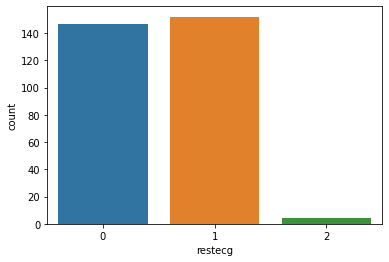

In [17]:
ecg= {}

for i in df['restecg']:
    if i in ecg:
        ecg[i] += 1
    else:
        ecg[i] = 1

for i, j in ecg.items():
    print(f"Type {i} has {j} patients")

    
# visualising the data
sns.countplot(x=df['restecg'])

plt.show()

#### exang

common disorder caused by the narrowing of the arteries that supply oxygen-rich blood to the heart muscle
- 1 = yes
- 0 = no

Type 0 has 204 patients
Type 1 has 99 patients


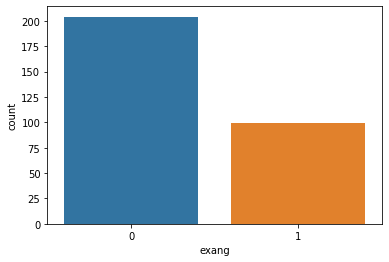

In [18]:
exang= {}

for i in df['exang']:
    if i in exang:
        exang[i] += 1
    else:
        exang[i] = 1

for i, j in exang.items():
    print(f"Type {i} has {j} patients")

    
# visualising the data
sns.countplot(x=df['exang'])

plt.show()

#### slope

Slope of the peak exercise ST segment
- 0: Upsloping
- 1: Flat
- 2: Downsloping

Pain Type 0 has 21 patients
Pain Type 2 has 142 patients
Pain Type 1 has 140 patients


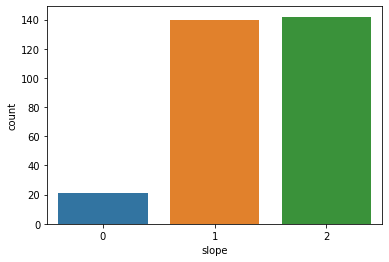

In [19]:
slope= {}

for i in df['slope']:
    if i in slope:
        slope[i] += 1
    else:
        slope[i] = 1

for i, j in slope.items():
    print(f"Pain Type {i} has {j} patients")

    
# visualising the data
sns.countplot(x=df['slope'])

plt.show()

#### num_major_vessels

Number of major vessels colored by fluoroscopy (0-3)

Pain Type 0 has 175 patients
Pain Type 2 has 38 patients
Pain Type 1 has 65 patients
Pain Type 3 has 20 patients
Pain Type 4 has 5 patients


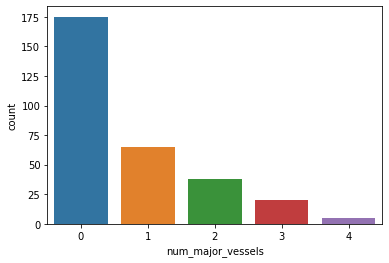

In [20]:
num= {}

for i in df['num_major_vessels']:
    if i in num:
        num[i] += 1
    else:
        num[i] = 1

for i, j in num.items():
    print(f"Pain Type {i} has {j} patients")

    
# visualising the data
sns.countplot(x=df['num_major_vessels'])

plt.show()

#### thal
Thalassemia
- 0: Normal
- 1: Fixed defect
- 2: Reversible defect

Pain Type 1 has 18 patients
Pain Type 2 has 166 patients
Pain Type 3 has 117 patients
Pain Type 0 has 2 patients


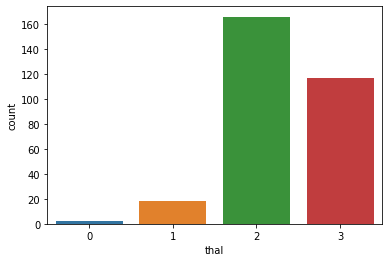

In [21]:
pain_type= {}

for i in df['thal']:
    if i in pain_type:
        pain_type[i] += 1
    else:
        pain_type[i] = 1

for i, j in pain_type.items():
    print(f"Pain Type {i} has {j} patients")

    
# visualising the data
sns.countplot(x=df['thal'])

plt.show()

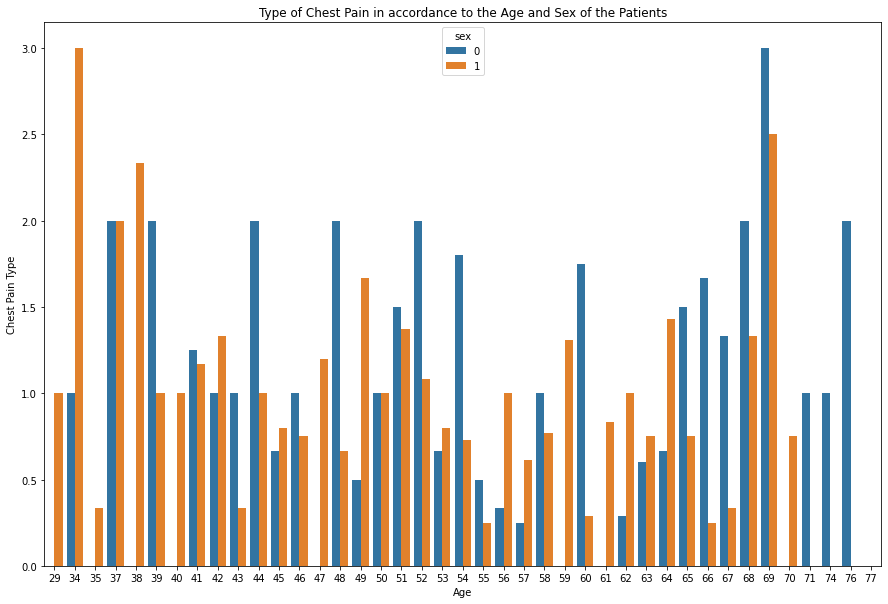

In [22]:
# 
plt.figure(figsize=(15,10))

sns.barplot(data=df, x='age', y='chest_pain_type', hue='sex', errorbar=None)
plt.title("Type of Chest Pain in accordance to the Age and Sex of the Patients")
plt.xlabel("Age")
plt.ylabel("Chest Pain Type")

plt.show()

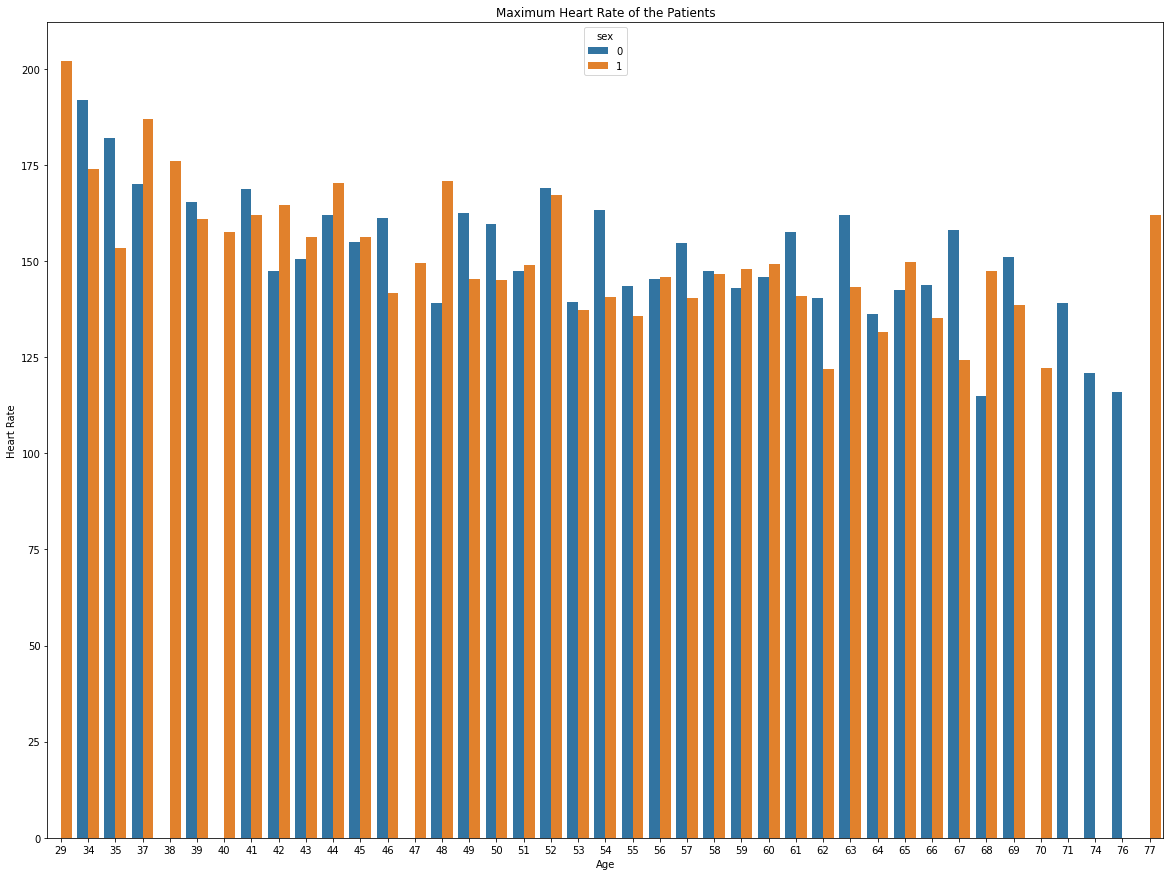

In [23]:
plt.figure(figsize=(20,15))

sns.barplot(data=df, x='age', y='max_hr', hue='sex', errorbar=None)
plt.title("Maximum Heart Rate of the Patients")
plt.xlabel("Age")
plt.ylabel("Heart Rate")

plt.show()

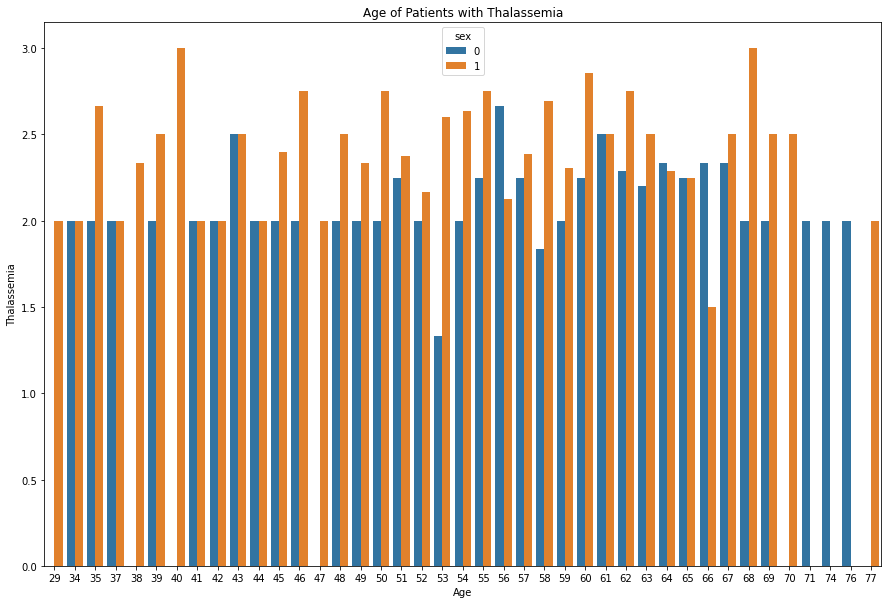

In [24]:
plt.figure(figsize=(15,10))

sns.barplot(data=df, x='age', y='thal', hue='sex', errorbar=None)
plt.title("Age of Patients with Thalassemia")
plt.xlabel("Age")
plt.ylabel("Thalassemia")

plt.show()

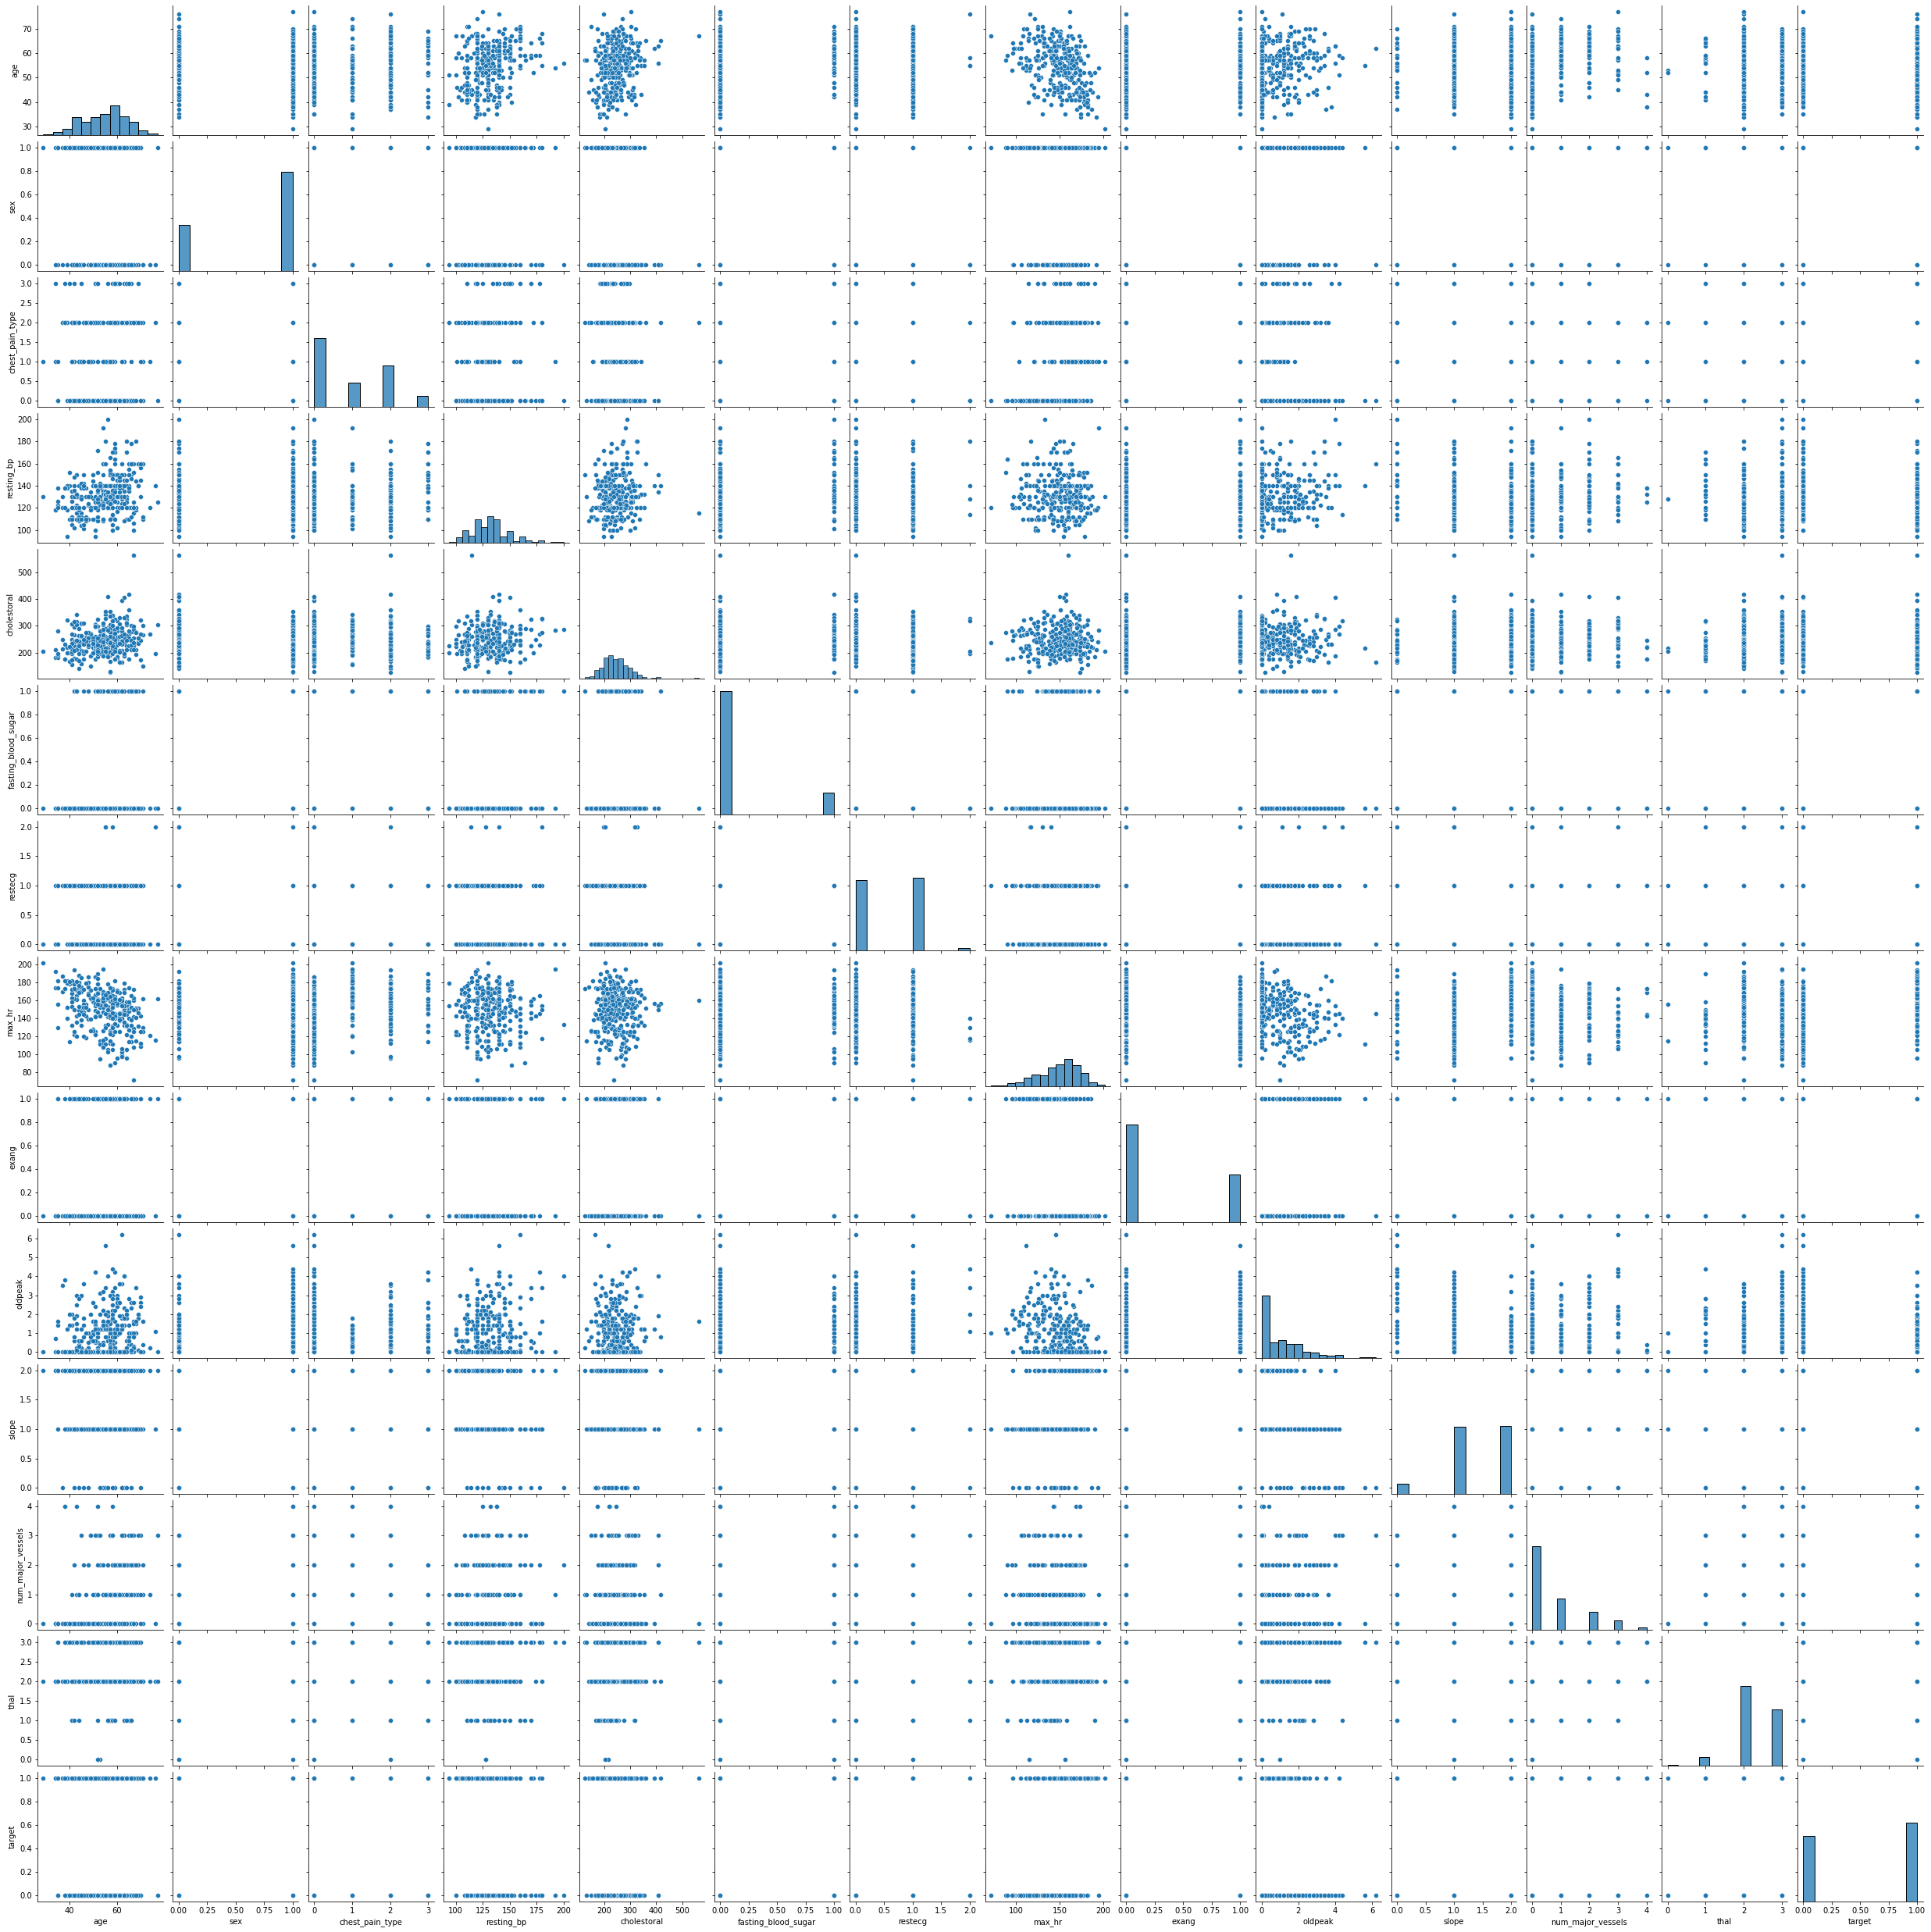

In [25]:
sns.pairplot(data=df)
plt.show()

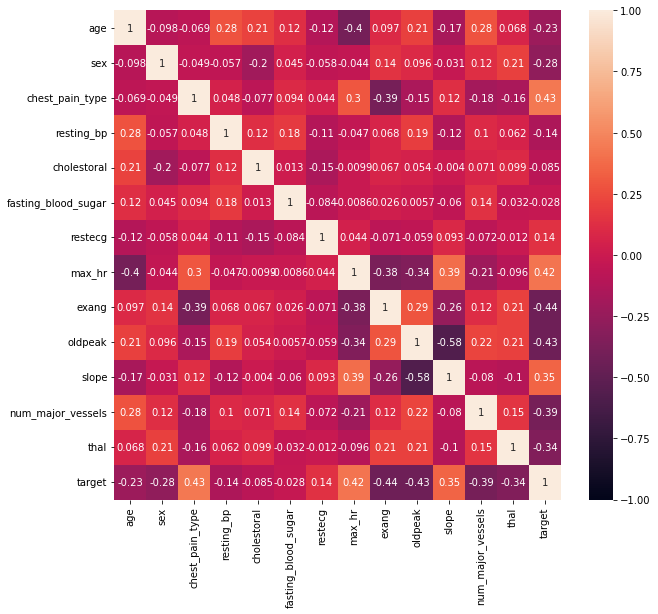

In [26]:
corr = df.corr(method='pearson')

plt.figure(figsize=(10,9))
sns.heatmap(corr, vmax=1.0, vmin=-1.0, annot=True)

plt.show()

### Splitting the Dataset

In [27]:
x = df.values[:, :-1]
y = df.values[:, -1]

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)

### Building the Predictive Model

#### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
y_pred = lr.predict(x_test)

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [32]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

         0.0       0.84      0.74      0.79        35
         1.0       0.70      0.81      0.75        26

    accuracy                           0.77        61
   macro avg       0.77      0.78      0.77        61
weighted avg       0.78      0.77      0.77        61



In [33]:
cfm = confusion_matrix(y_test, y_pred)
print(cfm)

[[26  9]
 [ 5 21]]


In [34]:
acs_lr = accuracy_score(y_test,y_pred)
print("Accuracy Score of the model:", round(acs_lr*100,2),"%")

Accuracy Score of the model: 77.05 %


#### K-Nearest Neighbour

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=int(np.sqrt(len(x_train))), 
                                 metric='euclidean')

knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [36]:
y_pred =knn.predict(x_test)

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [38]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

         0.0       0.80      0.57      0.67        35
         1.0       0.58      0.81      0.68        26

    accuracy                           0.67        61
   macro avg       0.69      0.69      0.67        61
weighted avg       0.71      0.67      0.67        61



In [39]:
cfm = confusion_matrix(y_test, y_pred)
print(cfm)

[[20 15]
 [ 5 21]]


In [40]:
acs_knn = accuracy_score(y_test,y_pred)
print("Accuracy Score of the model:", round(acs_knn*100, 2),"%")

Accuracy Score of the model: 67.21 %


#### Support Vector Machine

In [41]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf', gamma=0.1, C=1.0)
svc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [42]:
y_pred = svc.predict(x_test)

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [44]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        35
         1.0       0.43      1.00      0.60        26

    accuracy                           0.43        61
   macro avg       0.21      0.50      0.30        61
weighted avg       0.18      0.43      0.25        61



In [45]:
cfm = confusion_matrix(y_test, y_pred)
print(cfm)

[[ 0 35]
 [ 0 26]]


In [46]:
acs_svc = accuracy_score(y_test,y_pred)
print("Accuracy Score of the model:", round(acs_svc*100, 2),"%")

Accuracy Score of the model: 42.62 %


#### Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=10)

classifier_rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [48]:
y_pred = classifier_rf.predict(x_test)

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [50]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

         0.0       0.85      0.80      0.82        35
         1.0       0.75      0.81      0.78        26

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [51]:
cfm = confusion_matrix(y_test, y_pred)
print(cfm)

[[28  7]
 [ 5 21]]


In [52]:
acs_rf = accuracy_score(y_test,y_pred)
print("Accuracy Score of the model:", round(acs_rf*100,2))

Accuracy Score of the model: 80.33


#### XGBoost

In [53]:
from xgboost import XGBClassifier

classifier_xgb = XGBClassifier()
classifier_xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [54]:
y_pred = classifier_xgb.predict(x_test)

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [56]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84        35
         1.0       0.78      0.81      0.79        26

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [57]:
cfm = confusion_matrix(y_test, y_pred)
print(cfm)

[[29  6]
 [ 5 21]]


In [58]:
acs_xgb = accuracy_score(y_test,y_pred)
print("Accuracy Score of the model:", round(acs_xgb*100,2), "%")  

Accuracy Score of the model: 81.97 %


In [59]:
print(f"The R-squared value for: \nLogistic Regression: {round(acs_lr*100,2)}% \nK-Nearest Neighbours: {round(acs_lr*100,2)}% \nSupport Vector Machine: {round(acs_svc*100,2)}% \nRandom Forest: {round(acs_rf*100,2)}% \nXGBoost: {round(acs_xgb*100,2)}%")

The R-squared value for: 
Logistic Regression: 77.05% 
K-Nearest Neighbours: 77.05% 
Support Vector Machine: 42.62% 
Random Forest: 80.33% 
XGBoost: 81.97%


<div class="alert alert-block alert-success">
    <b>Among the 5 models that were used, namely Linear Regression, K-Nearest Neighbours, Support Vector Machine, Random Forest, and XGBoost, with a score of 81.97%, we can conclude that the "XGBoost" model is the best suited classification model for predicting the likelihood of cardiovascular diseases in individuals 
</div>